===========iteration:0===========
std=0.01:2.3025609339458315
Xavier:2.3109628642908047
He:2.398088586705552
===========iteration:100===========
std=0.01:2.3030027331966707
Xavier:2.256264203510311
He:1.4787034124765688
===========iteration:200===========
std=0.01:2.301149007907152
Xavier:2.1720026279895115
He:0.7296760367574968
===========iteration:300===========
std=0.01:2.3013458231203816
Xavier:1.9699824072962784
He:0.4988192084059969
===========iteration:400===========
std=0.01:2.3010582469688745
Xavier:1.425586471339904
He:0.3255014983986996
===========iteration:500===========
std=0.01:2.30283967123391
Xavier:1.045147120186575
He:0.3196275714912684
===========iteration:600===========
std=0.01:2.3023793699131625
Xavier:0.8204345268960349
He:0.35456145319906185
===========iteration:700===========
std=0.01:2.2984558247433817
Xavier:0.5491500549572457
He:0.24414996092184657
===========iteration:800===========
std=0.01:2.305131387681126
Xavier:0.4843886158290787
He:0.26144640945397835

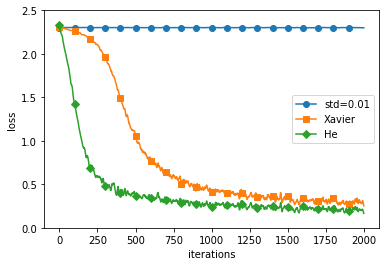

In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)
networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()